# Feed forward neural networks (FNN / FFNN)

Epoch 0/100, Loss: 1.1993
Epoch 10/100, Loss: 0.9459
Epoch 20/100, Loss: 0.7709
Epoch 30/100, Loss: 0.6909
Epoch 40/100, Loss: 0.6663
Epoch 50/100, Loss: 0.6470
Epoch 60/100, Loss: 0.6244
Epoch 70/100, Loss: 0.6056
Epoch 80/100, Loss: 0.5854
Epoch 90/100, Loss: 0.5687


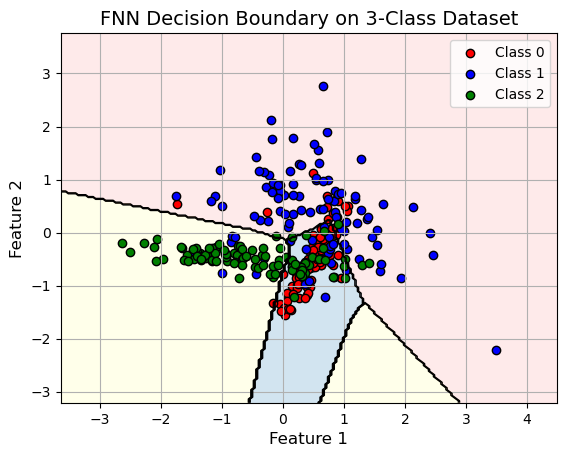

In [13]:
import torch
from torch import nn, optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Generate a complex dataset
X, y = make_classification(
    n_samples=300, 
    n_features=2, 
    n_classes=3, 
    n_informative=2, 
    n_redundant=0, 
    n_clusters_per_class=1, 
    class_sep=0.5, 
    flip_y=0.1, 
    random_state=42
)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define the Feedforward Neural Network
class FNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.fc(x)

# Initialize the model, loss function, and optimizer
input_size = 2
hidden_size = 16
output_size = 3  # Binary classification (2 classes)
model = FNN(input_size, hidden_size, output_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item():.4f}")

# Visualize the decision boundary
def plot_decision_boundary(X, y, model, num_classes):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    # Convert grid to tensor for predictions
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    model.eval()
    with torch.no_grad():
        Z = model(grid)
        Z = torch.argmax(Z, axis=1).numpy()
    
    # Plot decision boundary
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired, levels=num_classes)
    plt.contour(xx, yy, Z, levels=num_classes, colors='black', linewidths=1)

    # Plot data points
    colors = ['red', 'blue', 'green']
    for i in range(num_classes):
        plt.scatter(
            X[y == i, 0], X[y == i, 1], 
            color=colors[i], edgecolor='k', label=f"Class {i}"
        )
    
    plt.title("FNN Decision Boundary on 3-Class Dataset", fontsize=14)
    plt.xlabel("Feature 1", fontsize=12)
    plt.ylabel("Feature 2", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()


# Call the plotting function
plot_decision_boundary(X, y, model, num_classes=3)
